<a href="https://colab.research.google.com/github/Calista-F/CCSN-gravitational-wave-denoising/blob/main/Dimmelmeier_CCSN_Denoising_signal_96_5_(s20a3o15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import pandas as pd

from math import log10, sqrt
import cv2
import numpy as np

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
###copy pasted 

# Load worksheet
repo = gc.open_by_url('https://docs.google.com/spreadsheets/d/1WRXcWsKufZA1p_sCRQH3D6WG3k5U39pfYvxVbfkJGiU/edit#gid=0')
cleaned = repo.worksheet('GMA_cleaned_for_colab')

#make a df
data_cleaned = cleaned.get_all_values()
df_cleaned = pd.DataFrame(data_cleaned)
df_cleaned.columns = df_cleaned.iloc[0]
df_cleaned = df_cleaned.iloc[1:] #Reindex to 1 

# CCSN simmulation by Dimmelmeier 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ccsn_path = '/content/drive/MyDrive/Signals/CCSN_signal96_dist5.0.csv'

In [ ]:
ccsn_df = pd.read_csv(ccsn_path, names= ['time','signal + noise','signal template'])
ccsn_df.drop(ccsn_df.tail(1).index,inplace=True)
print(ccsn_df)

               time  signal + noise  signal template
0      1.130000e+09    5.820000e-21              0.0
1      1.130000e+09    1.180000e-23              0.0
2      1.130000e+09   -2.850000e-21              0.0
3      1.130000e+09   -3.680000e-21              0.0
4      1.130000e+09   -1.570000e-22              0.0
...             ...             ...              ...
49147  1.130000e+09    4.570000e-21              0.0
49148  1.130000e+09    4.020000e-21              0.0
49149  1.130000e+09    1.480000e-20              0.0
49150  1.130000e+09   -1.640000e-21              0.0
49151  1.130000e+09    6.840000e-21              0.0

[49152 rows x 3 columns]


0       0.000438
1       0.000219
2       0.000301
3       0.000048
4       0.000119
          ...   
4996    0.000000
4997    0.000000
4998    0.000000
4999    0.000000
5000    0.000000
Name: signal template, Length: 5001, dtype: float64


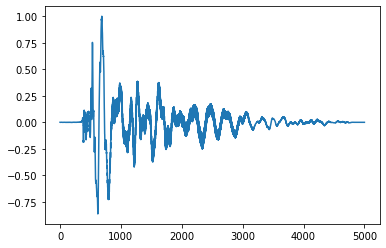

In [ ]:
signal_df = ccsn_df['signal template'].loc[20000:25000]
signal_df = signal_df/max(signal_df)
signal_df.reset_index(drop='True',inplace=True)
plt.plot(signal_df)
print(signal_df)

##Detector Noise from Dimmelmeier

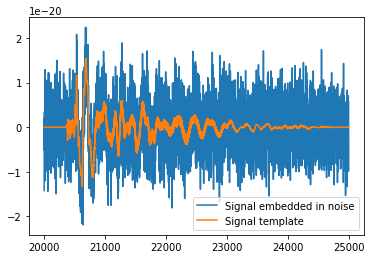

In [ ]:
torres_df = ccsn_df['signal + noise']
plt.plot(ccsn_df['signal + noise'].loc[20000:25000], label ='Signal embedded in noise')
plt.plot(ccsn_df['signal template'].loc[20000:25000], label ='Signal template')
plt.legend()

In [ ]:
torres_clean_VS = pd.DataFrame(denoise_wavelet(torres_df, method = 'VisuShrink', mode ='soft', wavelet_levels = 6, wavelet = 'sym8', rescale_sigma = 'True'))
torres_clean_BS = pd.DataFrame(denoise_wavelet(torres_df, method = 'BayesShrink', mode ='soft', wavelet_levels = 3, wavelet = 'sym8', rescale_sigma = 'True'))

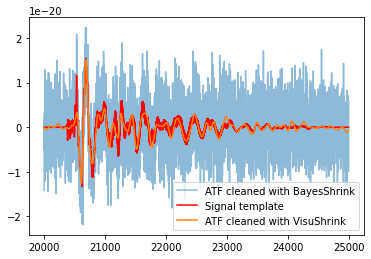

In [ ]:
plt.plot(torres_clean_BS.loc[20000:25000], label ='ATF cleaned with BayesShrink', alpha = 0.5)
#plt.plot(torres_df.loc[20000:25000], label ='ATF noisy')
plt.plot(ccsn_df['signal template'].loc[20000:25000], label ='Signal template',color = 'r')
plt.plot(torres_clean_VS.loc[20000:25000], label ='ATF cleaned with VisuShrink')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

def get_rmse(y_target, y_computed):
  RMSE = mean_squared_error(y_target, y_computed, squared=False)
  return RMSE

In [ ]:
get_rmse(ccsn_df['signal template'].loc[20000:25000], torres_clean_VS.loc[20000:25000])

1.1524614859331312e-21

In [ ]:
get_rmse(ccsn_df['signal template'].loc[20000:25000], torres_clean_BS.loc[20000:25000])

5.152695810076261e-21

In [ ]:
get_rmse(torres_clean_BS.loc[20000:25000], torres_clean_BS.loc[20000:25000])

0.0

In [ ]:
get_rmse(ccsn_df['signal template'].loc[20000:25000],ccsn_df['signal + noise'].loc[20000:25000] )

5.152695810078437e-21

In [ ]:
get_rmse(ccsn_df['signal template'].loc[20000:25000],torres_clean_BS.loc[20000:25000] )

5.152695810076261e-21